In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
'''
1 EDA:
- Преобразовать Credit Rating в 4 категории
- отфильтровать на выбросы + графики выбросов
- Отнормировать значения параметров + визуализации
- Educated guess про гипотезы и ml
- Закодировать категориальные перемеенные
2 разбить каждую категорию на выборки:
-
-
3 обучить модель на ML-ках:
-
-
'''

'\n1 EDA:\n- Преобразовать Credit Rating в 4 категории\n- отфильтровать на выбросы + графики выбросов\n- Отнормировать значения параметров + визуализации\n- Educated guess про гипотезы и ml\n- Закодировать категориальные перемеенные\n2 разбить каждую категорию на выборки:\n-\n-\n3 обучить модель на ML-ках:\n-\n-\n'

In [15]:
## Здесь будет расбор и анализ данных

#Чтение файла
df = pd.read_csv(r'C:\Проект по питону\corporateCreditRatingWithFinancialRatios.csv')
df.head()


,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [16]:
#Пропуски
df.isnull().sum()

Rating Agency                    0
Corporation                      0
Rating                           0
Rating Date                      0
CIK                              0
Binary Rating                    0
SIC Code                         0
Sector                           0
Ticker                           0
Current Ratio                    0
Long-term Debt / Capital         0
Debt/Equity Ratio                0
Gross Margin                     0
Operating Margin                 0
EBIT Margin                      0
EBITDA Margin                    0
Pre-Tax Profit Margin            0
Net Profit Margin                0
Asset Turnover                   0
ROE - Return On Equity           0
Return On Tangible Equity        0
ROA - Return On Assets           0
ROI - Return On Investment       0
Operating Cash Flow Per Share    0
Free Cash Flow Per Share         0
dtype: int64

In [17]:
df.describe()

,CIK,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
count,7.805000e+03,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000
mean,7.371616e+05,0.653299,4052.576810,1.926313,0.452804,0.177349,42.433909,11.531612,11.582683,20.071493,8.659944,5.995566,0.849843,15.950507,21.481589,4.575705,7.076084,0.479756,0.119491
std,5.143542e+05,0.475950,1870.848802,1.921651,2.629158,34.456334,23.742020,25.469044,25.483934,24.380407,27.866408,24.055577,0.696204,230.592526,462.734075,9.229899,24.382027,6.050626,7.253660
min,1.750000e+03,0.000000,100.000000,0.174900,-86.363600,-1473.098000,-87.684000,-461.787800,-461.787800,-360.816900,-476.010000,-414.824800,0.068400,-11258.210000,-14023.260000,-226.442500,-745.454500,-91.330200,-130.665800
25%,9.355600e+04,0.000000,2834.000000,1.077300,0.286500,0.419700,22.453900,6.098200,6.181100,11.162100,4.008700,2.637100,0.399500,6.022800,-12.233900,2.391900,3.692600,-0.448500,-0.723700
50%,8.795260e+05,1.000000,3714.000000,1.496800,0.427200,0.752800,39.635400,12.120100,12.155800,18.304500,9.705100,6.938900,0.661200,12.500000,10.564100,4.767500,7.440800,0.237800,0.133500
75%,1.091587e+06,1.000000,4931.000000,2.161000,0.542200,1.211600,59.641700,19.464600,19.539900,30.661600,16.676900,12.366700,1.038800,20.515700,26.894100,7.881300,12.515100,1.088800,0.997800
max,1.748790e+06,1.000000,9997.000000,34.076800,171.500000,194.375000,100.000000,93.993000,93.993000,286.493500,221.289400,219.390300,8.503900,7038.461000,9882.979000,114.716900,466.666700,282.192100,107.737700


Text(0.5, 1.0, 'Частота каждого рейтинга')

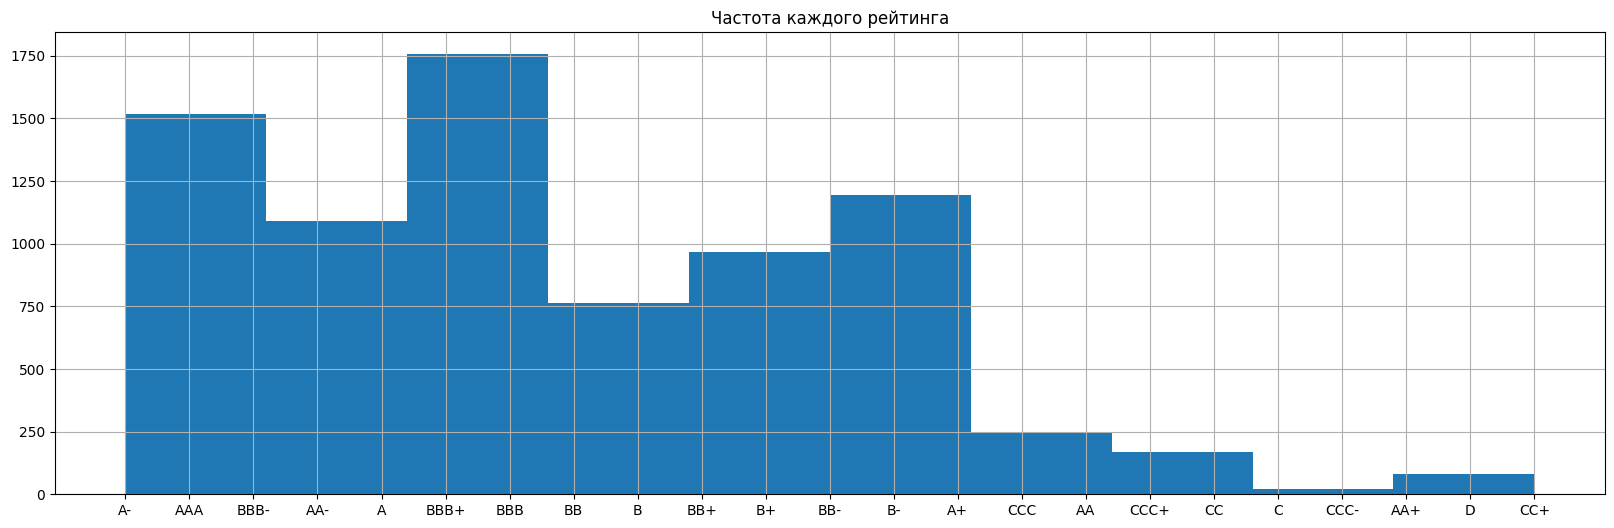

In [18]:
df['Rating'].hist(figsize=(20, 6))
plt.title('Частота каждого рейтинга')


In [19]:
df['Rating'].value_counts()

Rating
BBB     910
BBB+    846
A       836
A-      722
BBB-    705
BB+     545
A+      478
BB      453
BB-     427
B+      422
B       310
B-      288
AA-     254
AA      185
CCC+    151
AAA      90
AA+      73
CCC      65
CC       18
C        11
CCC-     10
D         5
CC+       1
Name: count, dtype: int64

In [20]:
df['Rating Agency'].unique()

array(["Standard & Poor's Ratings Services", 'DBRS',
       "Moody's Investors Service", 'Fitch Ratings',
       'Japan Credit Rating Agency,Ltd.',
       'HR Ratings de Mexico S.A. de C.V.', 'Egan-Jones Ratings Company'],
      dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   float64
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                   7805 non-null   f

In [22]:
categorical_features = ['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'Sector', 'Ticker']

numeric_features = []

In [23]:

#Добавил новую колонку 'Grouped rating', которая принимает 6 значений в зависимости от рейтинга компании: 
#Lowest risk; Low risk; Medium risk; High risk; Highest risk; In default
# Разбиение на 6 категорий обусловенно разбиение, которое делает 'investing.com'

df_1 = pd.read_csv(r'C:\Проект по питону\corporateCreditRatingWithFinancialRatios.csv')
rating = df_1['Rating'].values
rating_new = []

lowest_risk = ['AAA', 'AA+', 'AA', 'AA-']
low_risk = ['A+', 'A', 'A-']
med_risk = ['BBB+', 'BBB', 'BBB-']
high_risk = ['BB+', 'BB', 'BB-', 'B+', 'B', 'B-']
highest_risk = ['CCC+', 'CCC', 'CCC-', 'CC+', 'CC', 'C']
in_default = 'D'

for i in range(len(rating)):
    if rating[i] in lowest_risk:
        rating_new.append('Lowest risk')
    elif rating[i] in low_risk:
        rating_new.append('Low risk')
    elif rating[i] in med_risk:
        rating_new.append('Medium risk')
    elif rating[i] in high_risk:
        rating_new.append('High risk')
    elif rating[i] in highest_risk:
        rating_new.append('Highest risk')
    else:
        rating_new.append('In default')
df_1['Grouped rating'] = rating_new
df_1.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Grouped rating
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333,Low risk
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132,Lowest risk
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231,Medium risk
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999,Lowest risk
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174,Low risk


Text(0.5, 1.0, 'Гистограмма сгруппированного рейтинга')

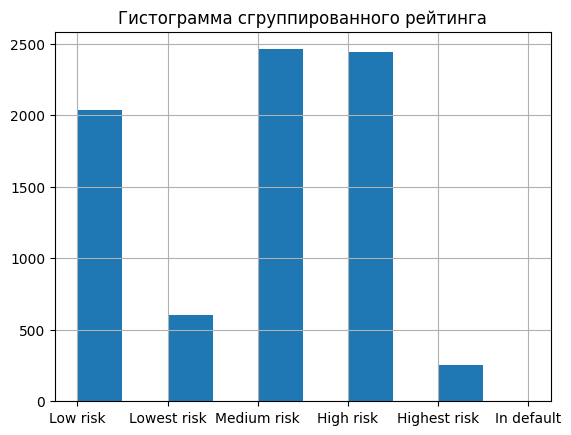

In [24]:

#Гистограмма сгруппированного рейтинга

df_1["Grouped rating"].hist();
plt.title('Гистограмма сгруппированного рейтинга')

#Компаний с рейтингом In default всего 5, поэтому удалим их из данных

In [25]:

#Данные с группированным рейтингом без In default
df_1 = df_1[df_1['Grouped rating'] != 'In default']
df_1.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Grouped rating
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333,Low risk
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132,Lowest risk
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231,Medium risk
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999,Lowest risk
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174,Low risk


In [26]:

# Анализ и фильтрация выбросов
df.describe()

,CIK,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
count,7.805000e+03,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000
mean,7.371616e+05,0.653299,4052.576810,1.926313,0.452804,0.177349,42.433909,11.531612,11.582683,20.071493,8.659944,5.995566,0.849843,15.950507,21.481589,4.575705,7.076084,0.479756,0.119491
std,5.143542e+05,0.475950,1870.848802,1.921651,2.629158,34.456334,23.742020,25.469044,25.483934,24.380407,27.866408,24.055577,0.696204,230.592526,462.734075,9.229899,24.382027,6.050626,7.253660
min,1.750000e+03,0.000000,100.000000,0.174900,-86.363600,-1473.098000,-87.684000,-461.787800,-461.787800,-360.816900,-476.010000,-414.824800,0.068400,-11258.210000,-14023.260000,-226.442500,-745.454500,-91.330200,-130.665800
25%,9.355600e+04,0.000000,2834.000000,1.077300,0.286500,0.419700,22.453900,6.098200,6.181100,11.162100,4.008700,2.637100,0.399500,6.022800,-12.233900,2.391900,3.692600,-0.448500,-0.723700
50%,8.795260e+05,1.000000,3714.000000,1.496800,0.427200,0.752800,39.635400,12.120100,12.155800,18.304500,9.705100,6.938900,0.661200,12.500000,10.564100,4.767500,7.440800,0.237800,0.133500
75%,1.091587e+06,1.000000,4931.000000,2.161000,0.542200,1.211600,59.641700,19.464600,19.539900,30.661600,16.676900,12.366700,1.038800,20.515700,26.894100,7.881300,12.515100,1.088800,0.997800
max,1.748790e+06,1.000000,9997.000000,34.076800,171.500000,194.375000,100.000000,93.993000,93.993000,286.493500,221.289400,219.390300,8.503900,7038.461000,9882.979000,114.716900,466.666700,282.192100,107.737700


In [27]:
# Как можно увидеть большинтсво параметров имеет явные выбросы

In [28]:
# Чтобы лучше понять имееющиеся выбросы в данных следует их визуализировать
# Построим графики для нескольких параметров

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5bd63e290>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5c03b8610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5c0320b10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5c03b9590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5c03b29d0>],
 'means': []}

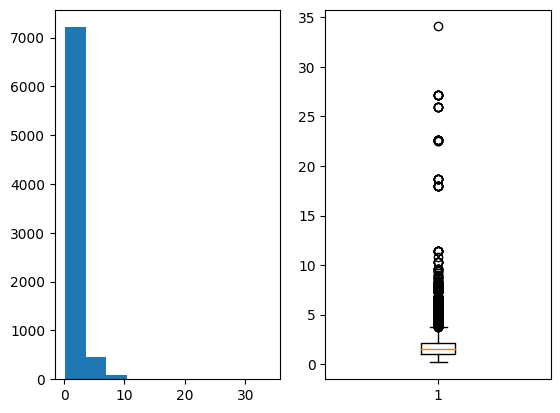

In [29]:
# Current Ratio
figure1, axes1 = plt.subplots(nrows=1, ncols=2)
axes1[0].hist(df['Current Ratio'])
axes1[1].boxplot(df['Current Ratio'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1f5c0b8b250>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5c0b98450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5c03bab10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5c0b99650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5c0b8a810>],
 'means': []}

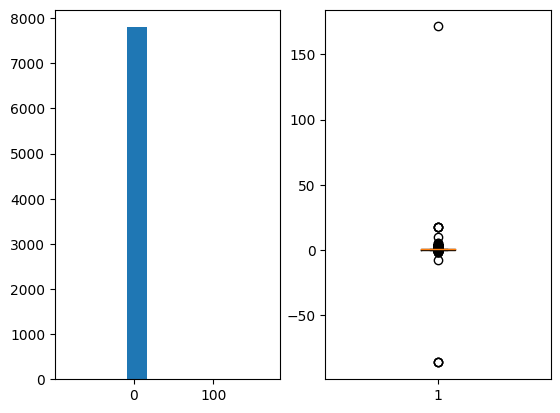

In [30]:
# Long-term Debt / Capital
figure2, axes2 = plt.subplots(nrows=1, ncols=2)
axes2[0].hist(df['Long-term Debt / Capital'])
axes2[1].boxplot(df['Long-term Debt / Capital'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1f5c00fb590>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5c0c70d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5c0bb4a10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5c0c72310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5c02fce50>],
 'means': []}

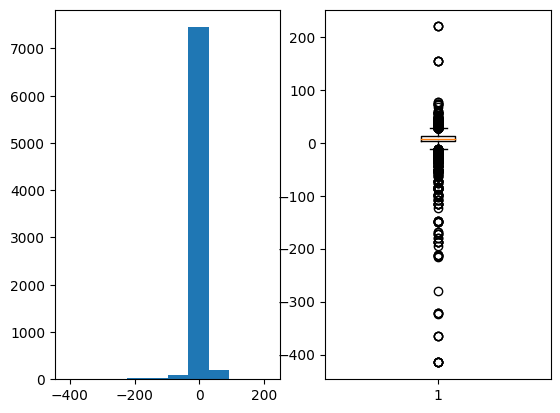

In [31]:
# Net Profit Margin
figure3, axes3 = plt.subplots(nrows=1, ncols=2)
axes3[0].hist(df['Net Profit Margin'])
axes3[1].boxplot(df['Net Profit Margin'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1f5c0688f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5c068a7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5c067e310>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5c068bd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5c0694710>],
 'means': []}

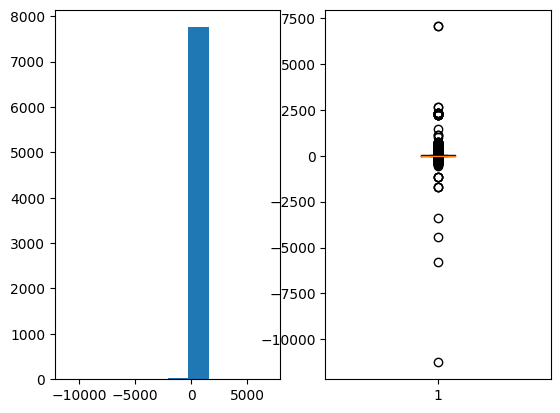

In [32]:
# ROE - Return On Equity
figure4, axes4 = plt.subplots(nrows=1, ncols=2)
axes4[0].hist(df['ROE - Return On Equity'])
axes4[1].boxplot(df['ROE - Return On Equity'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1f5c1cfe750>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5c1cfff10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5c1cfddd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5c1d09450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5c0139e90>],
 'means': []}

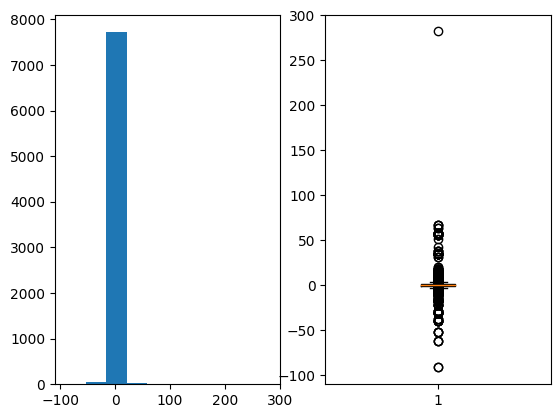

In [33]:
# Operating Cash Flow Per Share
figure5, axes5 = plt.subplots(nrows=1, ncols=2)
axes5[0].hist(df['Operating Cash Flow Per Share'])
axes5[1].boxplot(df['Operating Cash Flow Per Share'])

In [34]:
# Хоть здесь визуализированны не все параметры, но этим 5 уже вожно увидеть, что данные полны выбросов
# Из-за этого мы не можем видеть реального распределение значений параметров, выбросы слишком сильно отличаються от остальных значений

In [35]:
# Посмотрим на все параметры в целом
df_2 = df.copy(deep=True)

In [36]:
# Проанализируем все параметры на выбросы
def outlier_p(column):
    q1 = df_2[column].quantile(0.25)
    q3 = df_2[column].quantile(0.75)
    iqr = q3 - q1 
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    lower_out = len(df_2[df_2[column] < fence_low])  
    upper_out = len(df_2[df_2[column] > fence_high])
    outlier_count = upper_out + lower_out
    prop_out = outlier_count/len(df_2)
    return prop_out
for c in df_2.columns[9:26]:
    print(c, ": "+"{:.2%}".format(outlier_p(c)))


Current Ratio : 17.19%
Long-term Debt / Capital : 21.82%
Debt/Equity Ratio : 20.65%
Gross Margin : 9.12%
Operating Margin : 19.68%
EBIT Margin : 19.85%
EBITDA Margin : 15.63%
Pre-Tax Profit Margin : 22.10%
Net Profit Margin : 22.56%
Asset Turnover : 15.03%
ROE - Return On Equity : 26.11%
Return On Tangible Equity : 28.08%
ROA - Return On Assets : 23.66%
ROI - Return On Investment : 22.77%
Operating Cash Flow Per Share : 31.01%
Free Cash Flow Per Share : 30.31%


In [37]:
# Мы можем видеть, что все столбцы с параметрами содержать значительное количество выбросов, что подтверждает вывод, сделанный выше на основе визуализаций


In [38]:
# Теперь проверим сконцетрированны ли эти выбросы в отдельных стоках
df_outl = df_2.copy(deep=True)

def outliner_f(column):
    q1 = df_outl[column].quantile(0.25)
    q3 = df_outl[column].quantile(0.75)
    iqr = q3 - q1 
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    df_outl[column] = np.where(((df_outl[column] < fence_low) | (df_outl[column] > fence_high)), int(1), int(0))
    #df_outl[column] = np.where(df_outl[column] > fence_high, int(1), int(0))

for c in df_outl.columns[9:26]:
    outliner_f(c)
df_outl.head(10)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,0,...,0,0,0,0,0,0,0,0,1,0
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,0,...,0,0,0,0,0,1,0,1,0,0
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,0,...,0,0,0,1,0,0,0,0,1,1
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0,...,0,0,0,0,0,0,0,0,0,0
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,0,...,0,0,0,1,0,0,0,0,1,1
5,Standard & Poor's Ratings Services,Cardinal Health Inc.,BBB+,2010-09-16,721371,1,5122.0,Shops,CAH,0,...,0,0,0,1,0,0,0,0,1,1
6,Standard & Poor's Ratings Services,Carpenter Technology Corp.,BBB,2010-12-20,17843,1,3312.0,Manuf,CRS,1,...,0,0,0,0,0,0,0,0,0,0
7,Standard & Poor's Ratings Services,Companhia de Saneamento Basico do Estado de Sa...,BB,2010-12-07,1170858,0,4941.0,Utils,SBS,0,...,0,1,1,0,0,0,0,0,0,0
8,Standard & Poor's Ratings Services,Compass Group PLC,BBB+,2010-05-28,1563190,1,7371.0,BusEq,COMP,0,...,1,1,0,0,0,0,0,0,0,0
9,Standard & Poor's Ratings Services,Diageo PLC,A-,2010-10-01,835403,1,2085.0,NoDur,DEO,0,...,0,0,1,0,1,1,0,0,0,0


In [39]:
df_outl['Total_outliers'] = df_outl.iloc[:,9:26].sum(axis=1)

Text(0.5, 1.0, 'Гистограмма количества строк с выбросами')

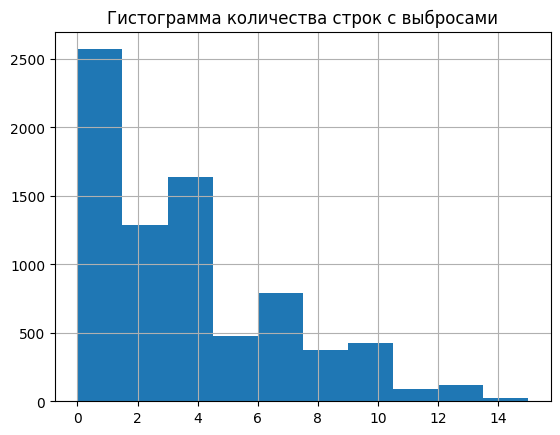

In [47]:


df_outl['Total_outliers'].hist()
plt.title('Гистограмма количества строк с выбросами')


In [41]:
# На графике видно, что только чуть больше 2500 из 7805 строк не обладают выбросами 
# Это нам говорит о том, что мы не можем просто исключить выбросы и они будут важны для построение нашей модели
# Поэтому для адекватной работы с ними нужно будет сделать их грамотную трансформацию

In [42]:
# Посмотрим насколько дынные ассиметричны
df_2.drop(columns = categorical_features).skew(axis=0) 


CIK                              -0.159194
Binary Rating                    -0.644347
SIC Code                          0.478101
Current Ratio                     7.260351
Long-term Debt / Capital         21.595244
Debt/Equity Ratio               -27.879850
Gross Margin                      0.352416
Operating Margin                 -9.754324
EBIT Margin                      -9.739402
EBITDA Margin                    -5.903670
Pre-Tax Profit Margin            -8.655398
Net Profit Margin                -8.689543
Asset Turnover                    2.770181
ROE - Return On Equity           -9.281851
Return On Tangible Equity         8.950553
ROA - Return On Assets           -5.268877
ROI - Return On Investment      -14.827059
Operating Cash Flow Per Share    13.536540
Free Cash Flow Per Share         -2.547216
dtype: float64

In [43]:
 #Как мы видим больщинство параметров имеют довольно сильную ассиметрию
# В качестве исключения выступает лишь параметр Gross Margin
# Ассиметрию большинства параметров нужно будет также учитывать в процессе нормировки данных

In [44]:
# Нормировка данных
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_norm = df_2.drop(columns = categorical_features)
names = df_norm.columns
d =  min_max_scaler.fit_transform(df_norm)

scaled_df1 = pd.DataFrame(d, columns=names)

scaled_df1


,CIK,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,0.603966,1.0,0.489138,0.028783,0.336685,0.883962,0.880773,0.865938,0.865938,0.602185,0.702165,0.667198,0.029506,0.615761,0.586937,0.671478,0.618674,0.249854,0.547528
1,0.003961,1.0,0.734970,0.027668,0.334948,0.883436,0.699825,0.866566,0.866566,0.594390,0.712578,0.675471,0.031296,0.616519,0.588572,0.676918,0.633048,0.245180,0.549400
2,0.004069,1.0,0.501667,0.051699,0.336054,0.883687,0.530598,0.836850,0.836850,0.563023,0.687027,0.657453,0.283753,0.616060,0.587297,0.679200,0.622961,0.224143,0.517370
3,0.591544,1.0,0.489138,0.019494,0.336745,0.884001,0.810903,0.864087,0.864087,0.600569,0.704322,0.668305,0.026815,0.615842,0.587000,0.671536,0.619209,0.249179,0.544312
4,0.411909,1.0,0.507426,0.032983,0.335945,0.883673,0.487641,0.833269,0.833269,0.559858,0.684412,0.655104,0.576042,0.615923,0.587406,0.672351,0.621752,0.249792,0.558227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,0.608651,1.0,0.734566,0.097865,0.336884,0.884047,0.890176,0.876889,0.876889,0.609264,0.722807,0.685732,0.049256,0.616933,0.590596,0.695887,0.627055,0.241212,0.542707
7801,0.608651,1.0,0.734566,0.097865,0.336884,0.884047,0.890176,0.876889,0.876889,0.609264,0.722807,0.685732,0.049256,0.616933,0.590596,0.695887,0.627055,0.241212,0.542707
7802,0.422405,0.0,0.478125,0.046773,0.335321,0.883523,0.756392,0.856512,0.856512,0.579416,0.700894,0.666789,0.089313,0.615961,0.587159,0.686335,0.623753,0.244754,0.553352
7803,0.422405,0.0,0.478125,0.046773,0.335321,0.883523,0.756392,0.856512,0.856512,0.579416,0.700894,0.666789,0.089313,0.615961,0.587159,0.686335,0.623753,0.244754,0.553352


In [48]:
# Визуализация корреляций
scaled_df1['Grouped rating'] = df_1['Grouped rating']
conditions = [
    (scaled_df1['Grouped rating'] == 'Lowest risk'),
    (scaled_df1['Grouped rating'] == 'Low risk'),
    (scaled_df1['Grouped rating'] == 'Medium risk'),
    (scaled_df1['Grouped rating'] == 'High risk'),
    (scaled_df1['Grouped rating'] == 'Highest risk')
]
values = [1, 2, 3, 4, 5]
scaled_df1['Numeric rating'] = np.select(conditions, values)
scaled_df1




,CIK,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,...,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Grouped rating,Numeric rating
0,0.603966,1.0,0.489138,0.028783,0.336685,0.883962,0.880773,0.865938,0.865938,0.602185,...,0.667198,0.029506,0.615761,0.586937,0.671478,0.618674,0.249854,0.547528,Low risk,2
1,0.003961,1.0,0.734970,0.027668,0.334948,0.883436,0.699825,0.866566,0.866566,0.594390,...,0.675471,0.031296,0.616519,0.588572,0.676918,0.633048,0.245180,0.549400,Lowest risk,1
2,0.004069,1.0,0.501667,0.051699,0.336054,0.883687,0.530598,0.836850,0.836850,0.563023,...,0.657453,0.283753,0.616060,0.587297,0.679200,0.622961,0.224143,0.517370,Medium risk,3
3,0.591544,1.0,0.489138,0.019494,0.336745,0.884001,0.810903,0.864087,0.864087,0.600569,...,0.668305,0.026815,0.615842,0.587000,0.671536,0.619209,0.249179,0.544312,Lowest risk,1
4,0.411909,1.0,0.507426,0.032983,0.335945,0.883673,0.487641,0.833269,0.833269,0.559858,...,0.655104,0.576042,0.615923,0.587406,0.672351,0.621752,0.249792,0.558227,Low risk,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,0.608651,1.0,0.734566,0.097865,0.336884,0.884047,0.890176,0.876889,0.876889,0.609264,...,0.685732,0.049256,0.616933,0.590596,0.695887,0.627055,0.241212,0.542707,Medium risk,3
7801,0.608651,1.0,0.734566,0.097865,0.336884,0.884047,0.890176,0.876889,0.876889,0.609264,...,0.685732,0.049256,0.616933,0.590596,0.695887,0.627055,0.241212,0.542707,Medium risk,3
7802,0.422405,0.0,0.478125,0.046773,0.335321,0.883523,0.756392,0.856512,0.856512,0.579416,...,0.666789,0.089313,0.615961,0.587159,0.686335,0.623753,0.244754,0.553352,Highest risk,5
7803,0.422405,0.0,0.478125,0.046773,0.335321,0.883523,0.756392,0.856512,0.856512,0.579416,...,0.666789,0.089313,0.615961,0.587159,0.686335,0.623753,0.244754,0.553352,Highest risk,5


In [56]:
scaled_df1.drop(columns='Grouped rating').corr()['Numeric rating']


CIK                              0.229217
Binary Rating                   -0.812496
SIC Code                         0.027341
Current Ratio                    0.154858
Long-term Debt / Capital         0.045151
Debt/Equity Ratio               -0.017594
Gross Margin                    -0.174361
Operating Margin                -0.193754
EBIT Margin                     -0.194421
EBITDA Margin                   -0.152324
Pre-Tax Profit Margin           -0.222174
Net Profit Margin               -0.205452
Asset Turnover                  -0.027297
ROE - Return On Equity          -0.036368
Return On Tangible Equity       -0.038883
ROA - Return On Assets          -0.260339
ROI - Return On Investment      -0.177607
Operating Cash Flow Per Share   -0.003836
Free Cash Flow Per Share        -0.013810
Numeric rating                   1.000000
Name: Numeric rating, dtype: float64

<AxesSubplot: xlabel='Current Ratio', ylabel='Numeric rating'>

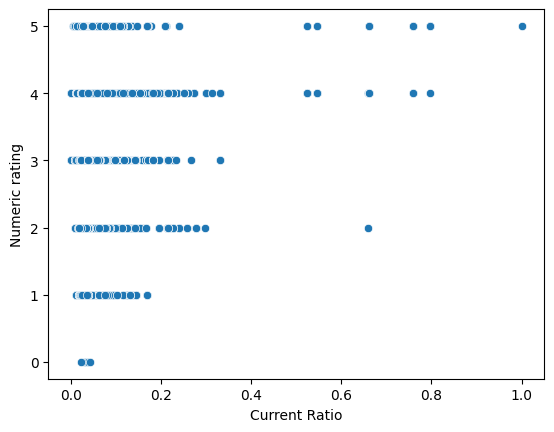

In [ ]:
# Визуализация корреляций
sns.scatterplot(data = scaled_df1, x = 'Current Ratio', y = 'Numeric rating')

<AxesSubplot: xlabel='ROA - Return On Assets', ylabel='Numeric rating'>

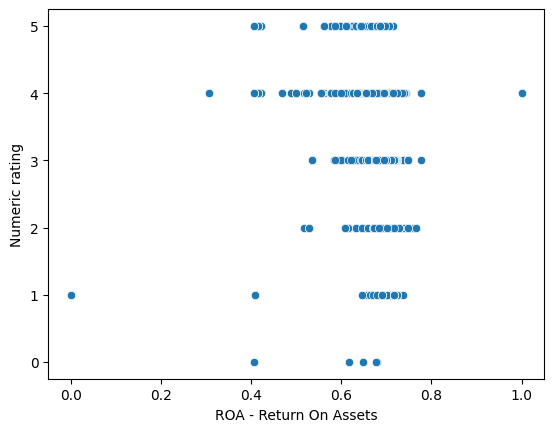

In [ ]:
sns.scatterplot(data = scaled_df1, x = 'ROA - Return On Assets', y = 'Numeric rating')

In [ ]:
# На основе имеющийся корреляций на данном этапе сложно делать какие-то выводы сложно делать какие-то выводы
# Скорее всего требуюеться более основательный подход к преобразованию категориальных переменных

In [ ]:
'''
Касательно выбора модели для машинного обучения в начале мы скорее всего будем использовать Logistic regression
Однако принимая во внимание ограниченную эффективность данной модели для работы с таким датасетом и предсказанием сразу нескольких меток.
Для выбора еще одной модели мы воспользовались ChatGPT, по причиние низкий знаний в области моделей отличных от Logistic Regression и Linear Regression.

Запрос: 
Какой модель машинного обучения будет показывать лучший результат, если целью является предсказание кредитного  рейтинга  компаний на основе их финансовых показателей, 
их число равно 17 и они являются числовыми признакми,  и сектора компании, который являеться категориальным признаком. Всего меток в модели будет 4.

Ответ:
Для данной задачи лучшей моделью машинного обучения будет случайный лес (Random Forest). 
Random Forest может эффективно работать с большим количеством числовых признаков и категориальными признаками, 
и может обрабатывать несбалансированные данные, что может быть удобным при работе с кредитными рейтингами компаний. 
Кроме того, Random Forest имеет хорошую производительность и способен обнаруживать важные признаки, 
что может быть полезным при исследовании финансовых показателей компаний.

Таким образом еще одной моделью будет являться Random Forest
'''

In [ ]:
# Кодировка категориальных переменных
categorical_features = ['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'Sector', 'Ticker']
